In [1]:
from functools import reduce

import numpy as np
import pandas as pd

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from matplotlib import pyplot as plt 
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('seaborn')

# Import CSV


In [2]:
data = pd.read_csv("./Data/data.csv")
data['GDP per Capita'] = data['GDP per Capita'].replace('[\$,]', '', regex=True).astype(float)
data

,Country,Region_x,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Afghanistan,Middle East/Central Asia,29.82,0.46,614.66,0.30,0.20,0.08,0.18,0.00,...,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
1,Albania,Northern/Eastern Europe,3.16,0.73,4534.37,0.78,0.22,0.25,0.87,0.02,...,4.655,4.546,4.764,0.95530,0.50163,0.73007,0.31866,0.05301,0.16840,1.92816
2,Algeria,Africa,38.48,0.73,5430.57,0.60,0.16,0.17,1.14,0.01,...,6.355,6.227,6.483,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044,3.40904
3,Angola,Africa,20.82,0.52,4665.91,0.33,0.15,0.12,0.20,0.09,...,3.866,3.753,3.979,0.84731,0.66366,0.04991,0.00589,0.08434,0.12071,2.09459
4,Argentina,Latin America,41.09,0.83,13540.00,0.78,0.79,0.29,1.08,0.10,...,6.650,6.560,6.740,1.15137,1.06612,0.69711,0.42284,0.07296,0.10989,3.12985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Uzbekistan,Middle East/Central Asia,28.54,0.67,1560.85,0.62,0.13,0.08,1.41,0.00,...,5.987,5.896,6.078,0.73591,1.16810,0.50163,0.60848,0.28333,0.34326,2.34638
123,Vietnam,Asia-Pacific,90.80,0.66,1532.31,0.50,0.01,0.19,0.79,0.05,...,5.061,4.991,5.131,0.74037,0.79117,0.66157,0.55954,0.11556,0.25075,1.94180
124,Yemen,Middle East/Central Asia,23.85,0.50,1302.30,0.34,0.14,0.04,0.42,0.04,...,3.724,3.621,3.827,0.57939,0.47493,0.31048,0.22870,0.05892,0.09821,1.97295
125,Zambia,Africa,14.08,0.58,1740.64,0.19,0.18,0.33,0.24,0.01,...,4.795,4.645,4.945,0.61202,0.63760,0.23573,0.42662,0.11479,0.17866,2.58991


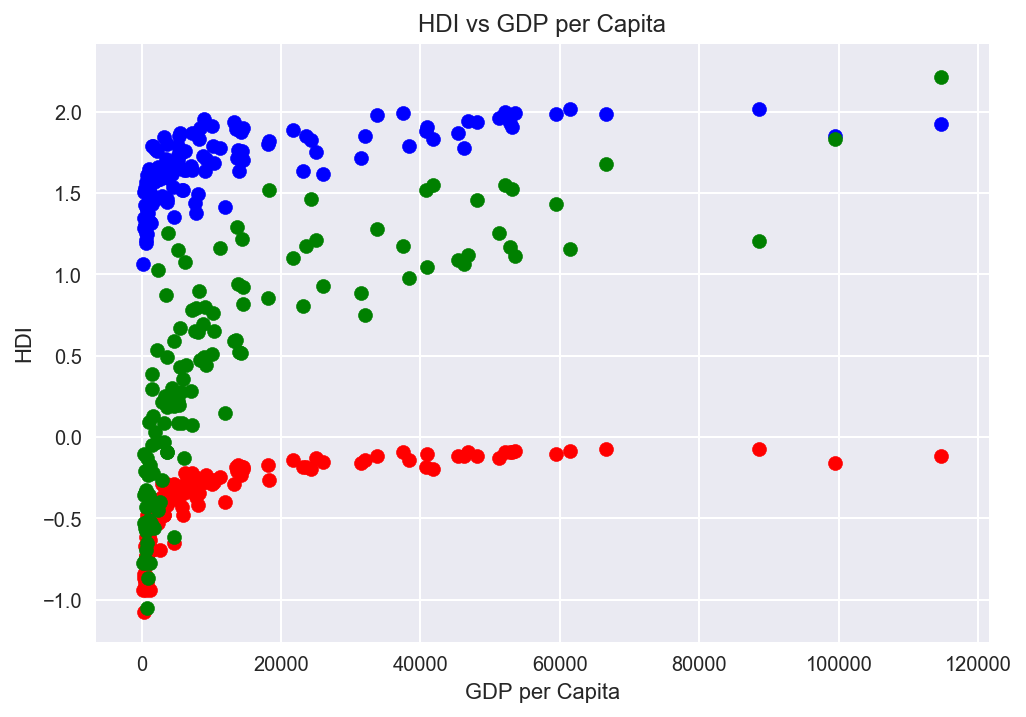

In [3]:
plt.style.use('seaborn')

plt.figure()
plt.scatter(data['GDP per Capita'], np.log(data['HDI']), marker='o', color='r')
plt.scatter(data['GDP per Capita'], np.log(data['Happiness Score']), marker='o', color='b')
plt.scatter(data['GDP per Capita'], np.log(data['Earths Required']), marker='o', color='g')

plt.title('HDI vs GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('HDI')
plt.show()

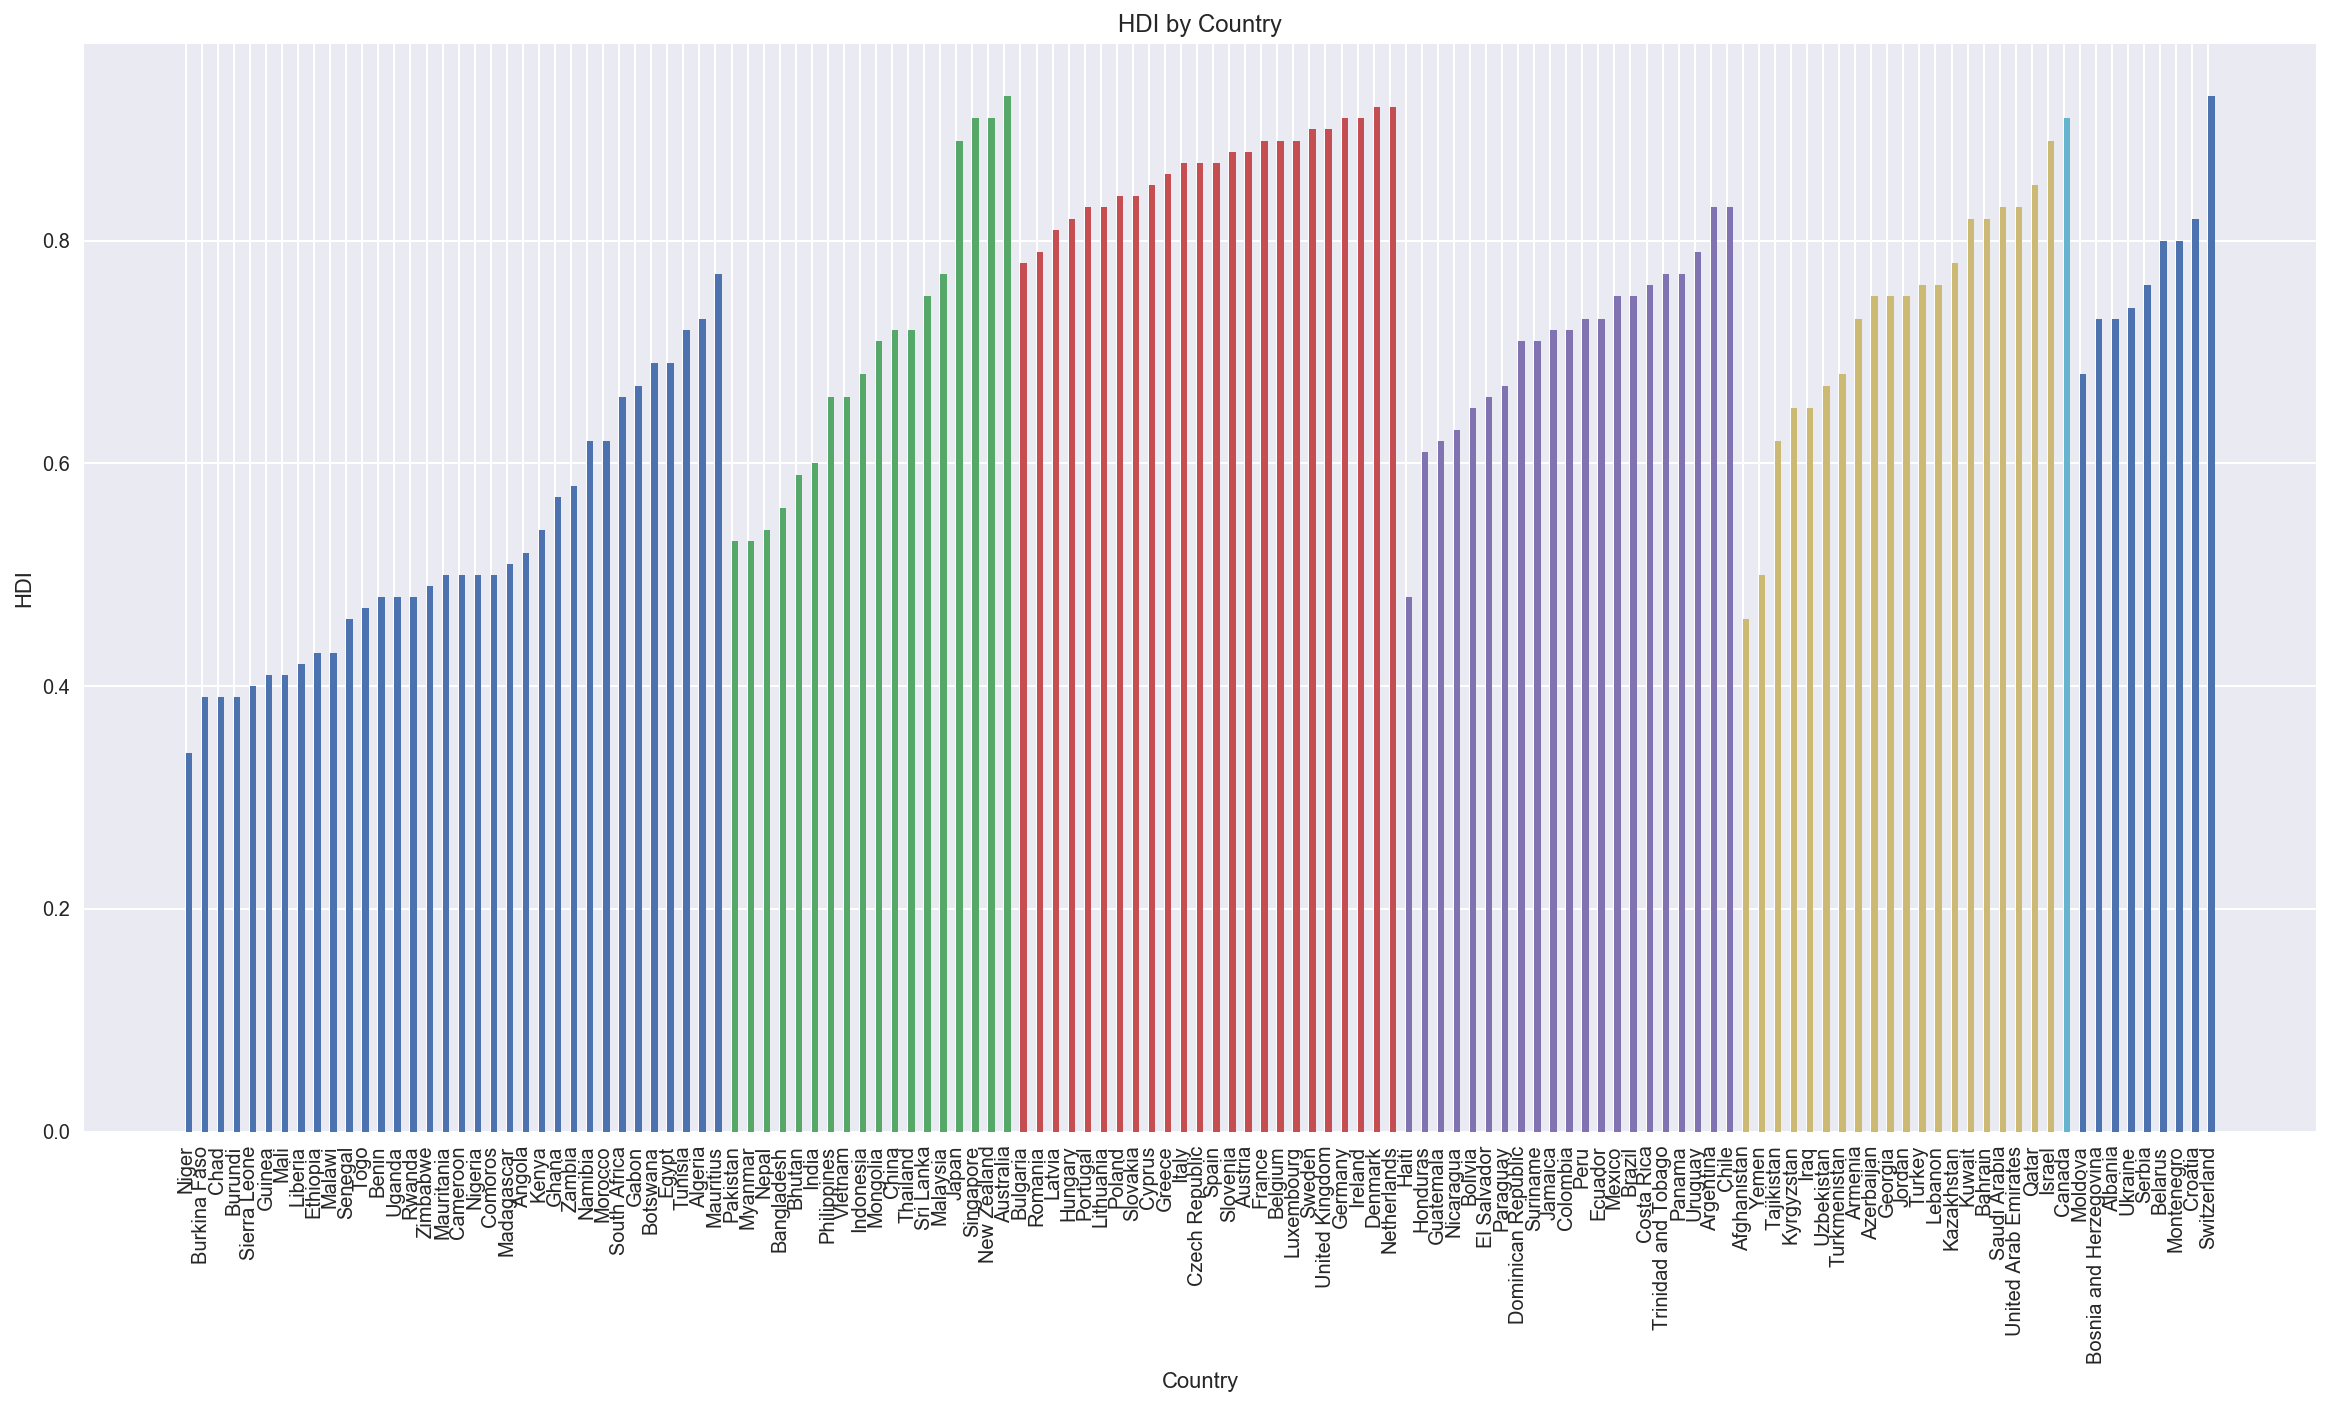

Text(0, 0.5, 'Regional GDP per Capita Mean')

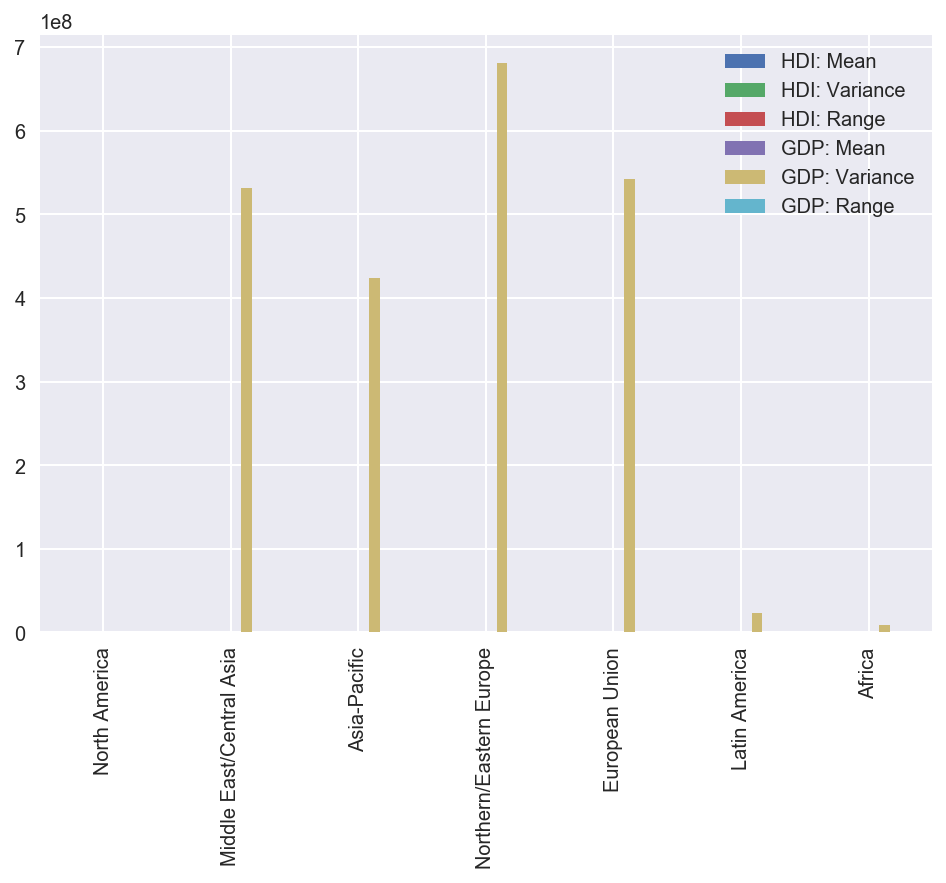

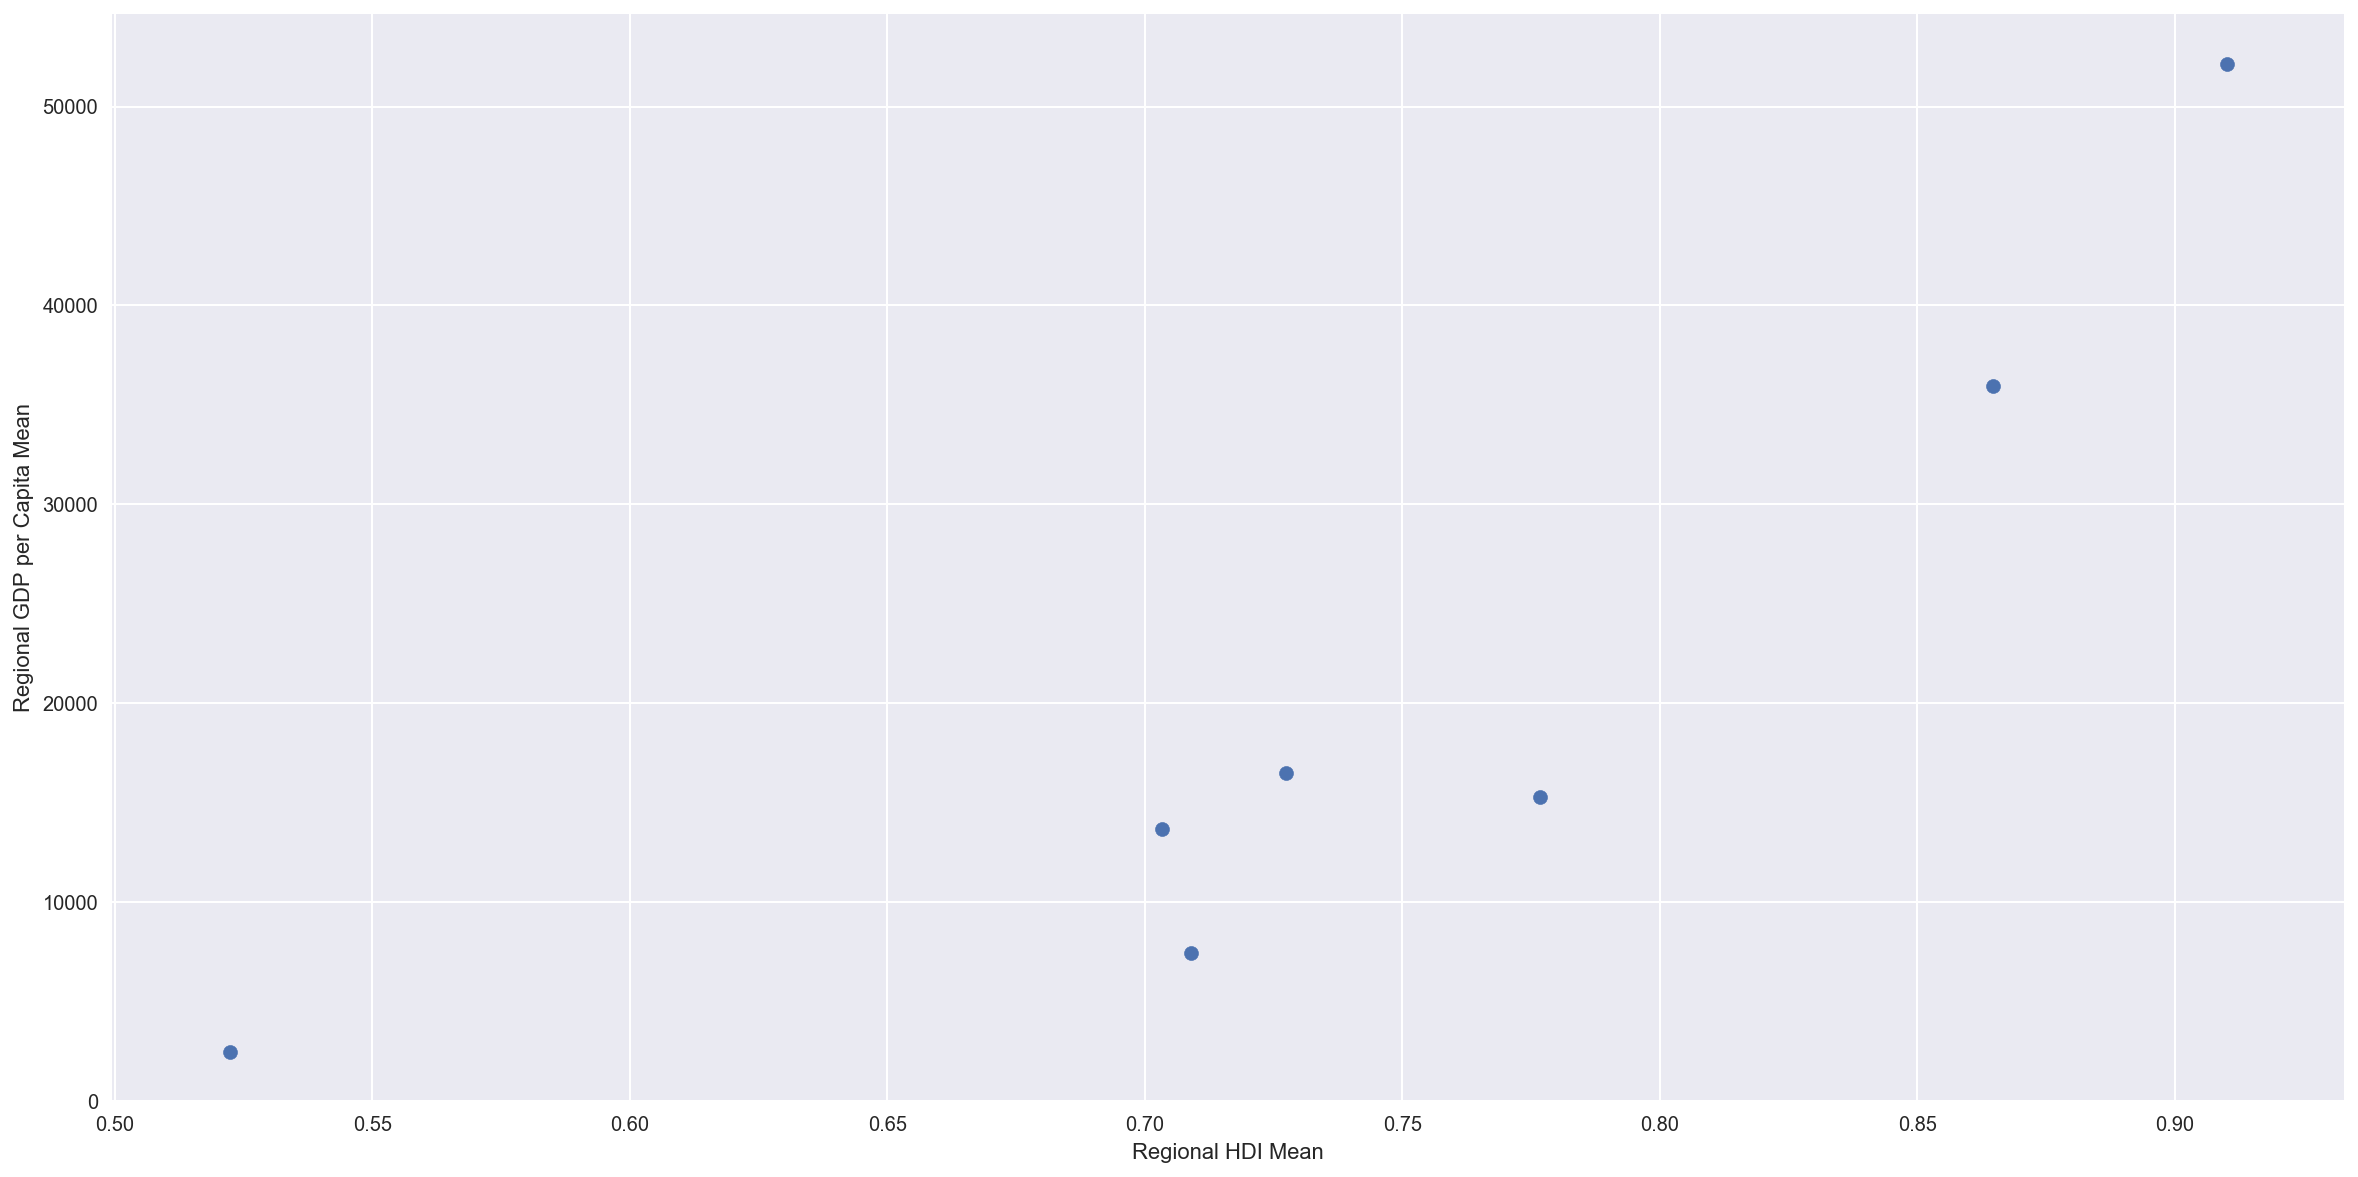

In [4]:
data = data.sort_values('HDI')

plt.figure(figsize=(20, 10))
region_data = {k : [] for k in set(data['Region_x'])}

for k, d in data.groupby('Region_x'):
    region_data[k].append(np.mean(d.HDI))
    region_data[k].append(np.var(d.HDI))
    region_data[k].append(np.max(d.HDI) - np.min(d.HDI))

    region_data[k].append(np.mean(d['GDP per Capita']))
    region_data[k].append(np.var(d['GDP per Capita']))
    region_data[k].append(np.max(d['GDP per Capita']) - np.min(d['GDP per Capita']))
    
    plt.bar(d.Country, d.HDI, width=.4, align='edge')
    plt.xticks(rotation=90)
plt.ylabel("HDI")
plt.xlabel("Country")
plt.title("HDI by Country")
plt.show()

df = pd.DataFrame(region_data)
df.index = ['HDI: Mean', 'HDI: Variance', 'HDI: Range', 'GDP: Mean','GDP: Variance', 'GDP: Range']
df.T.plot.bar()

plt.figure(figsize=(20, 10))
plt.scatter(df.T['HDI: Mean'], df.T['GDP: Mean'])
plt.xlabel("Regional HDI Mean")
plt.ylabel("Regional GDP per Capita Mean")

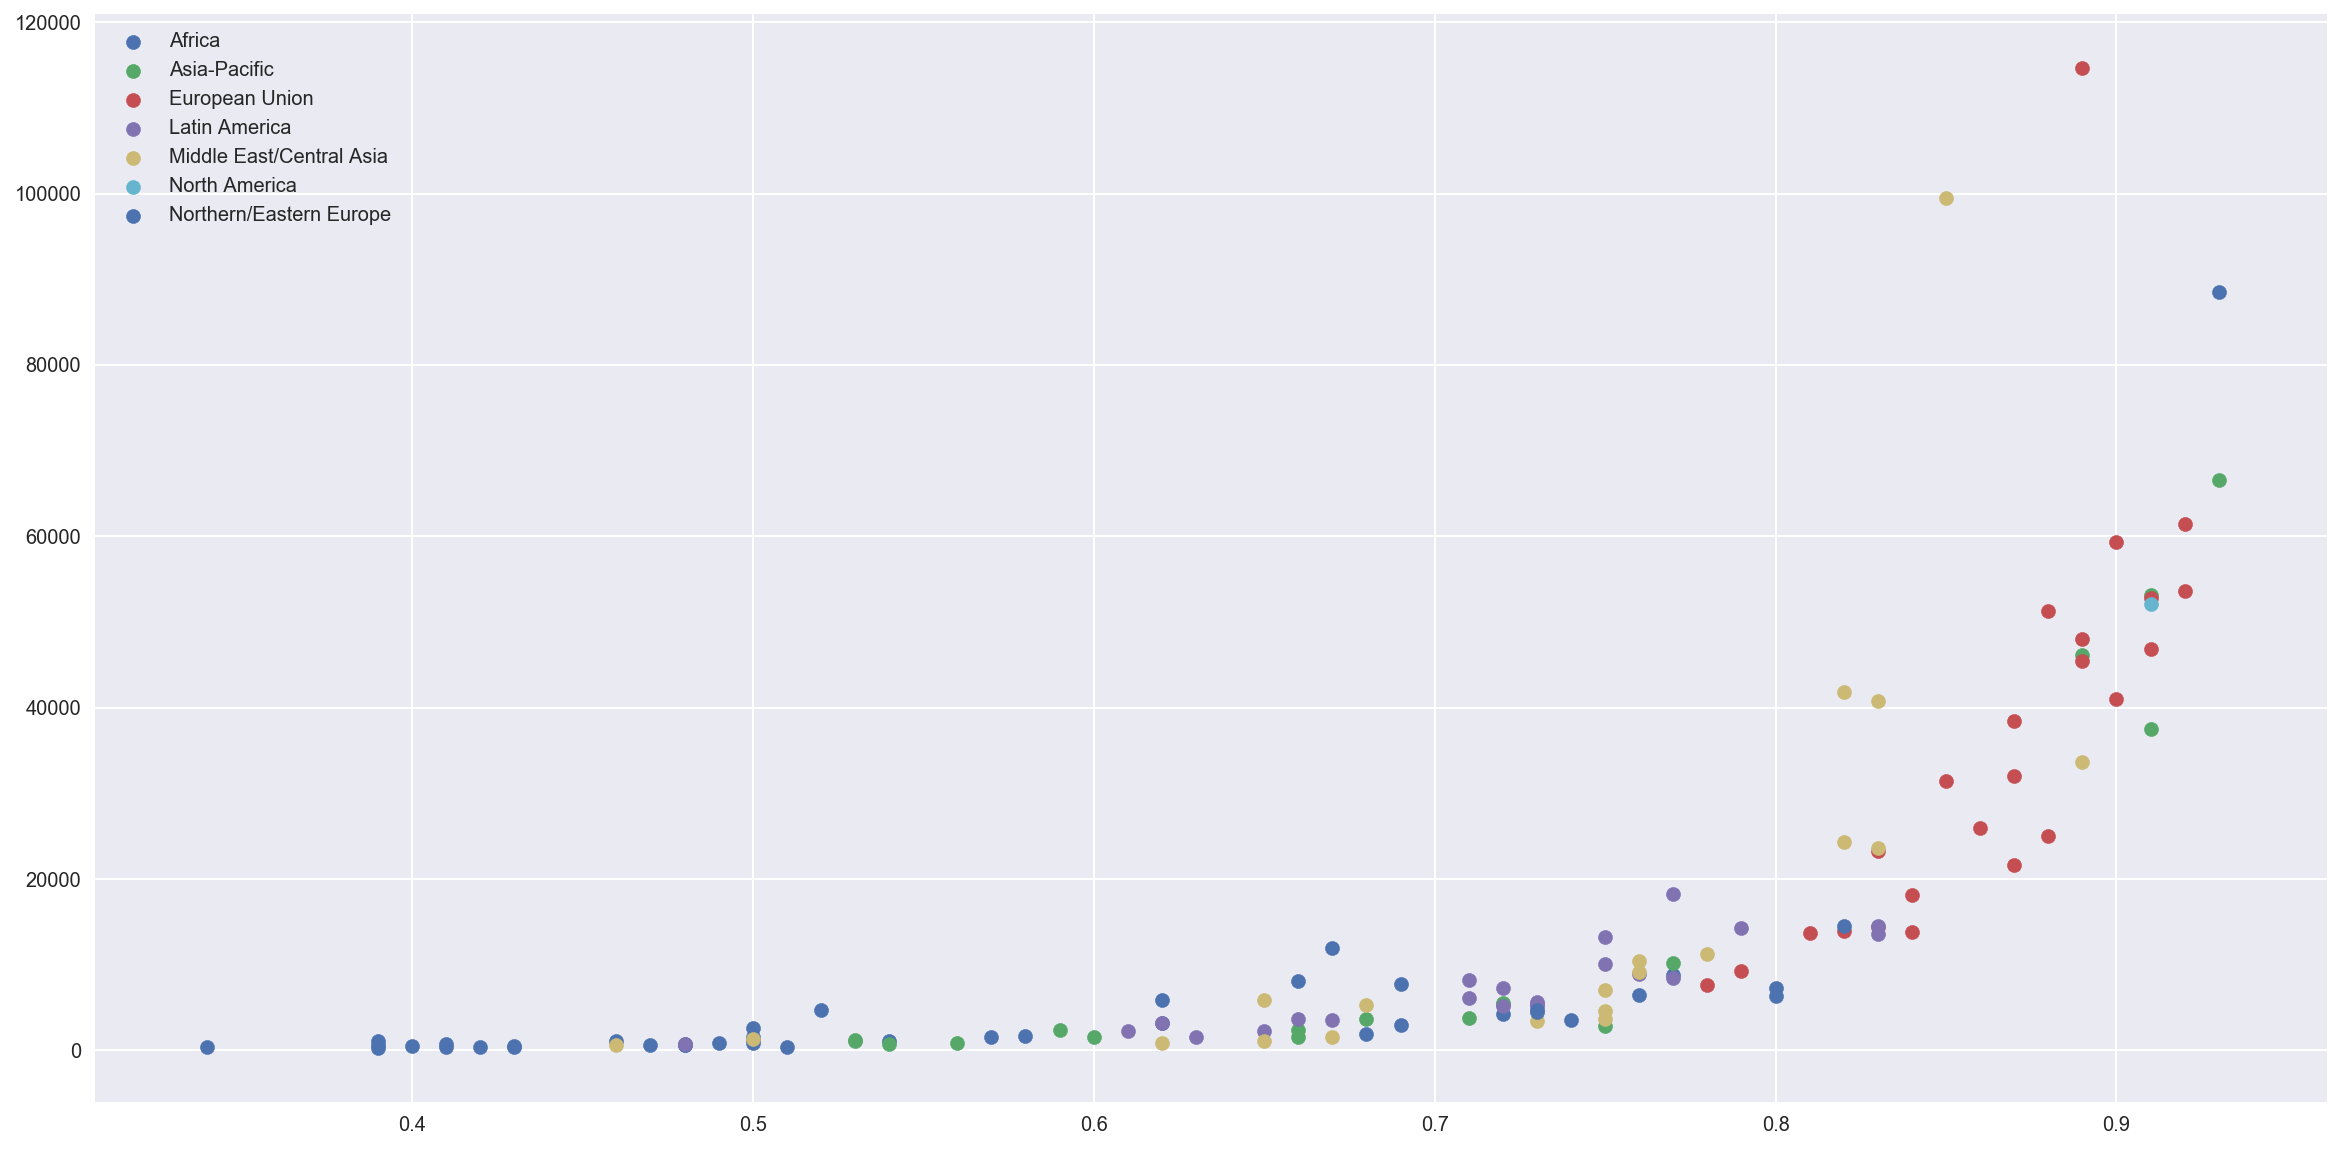

In [5]:
plt.figure(figsize=(20, 10))
labels = []
for k, d in data.groupby('Region_x'):
    labels.append(str(k))
    plt.scatter(d.HDI, d['GDP per Capita'])
plt.legend(labels)
plt.show()

# Visualizations (Nov 17th)

# Comparing Resources vs Traits

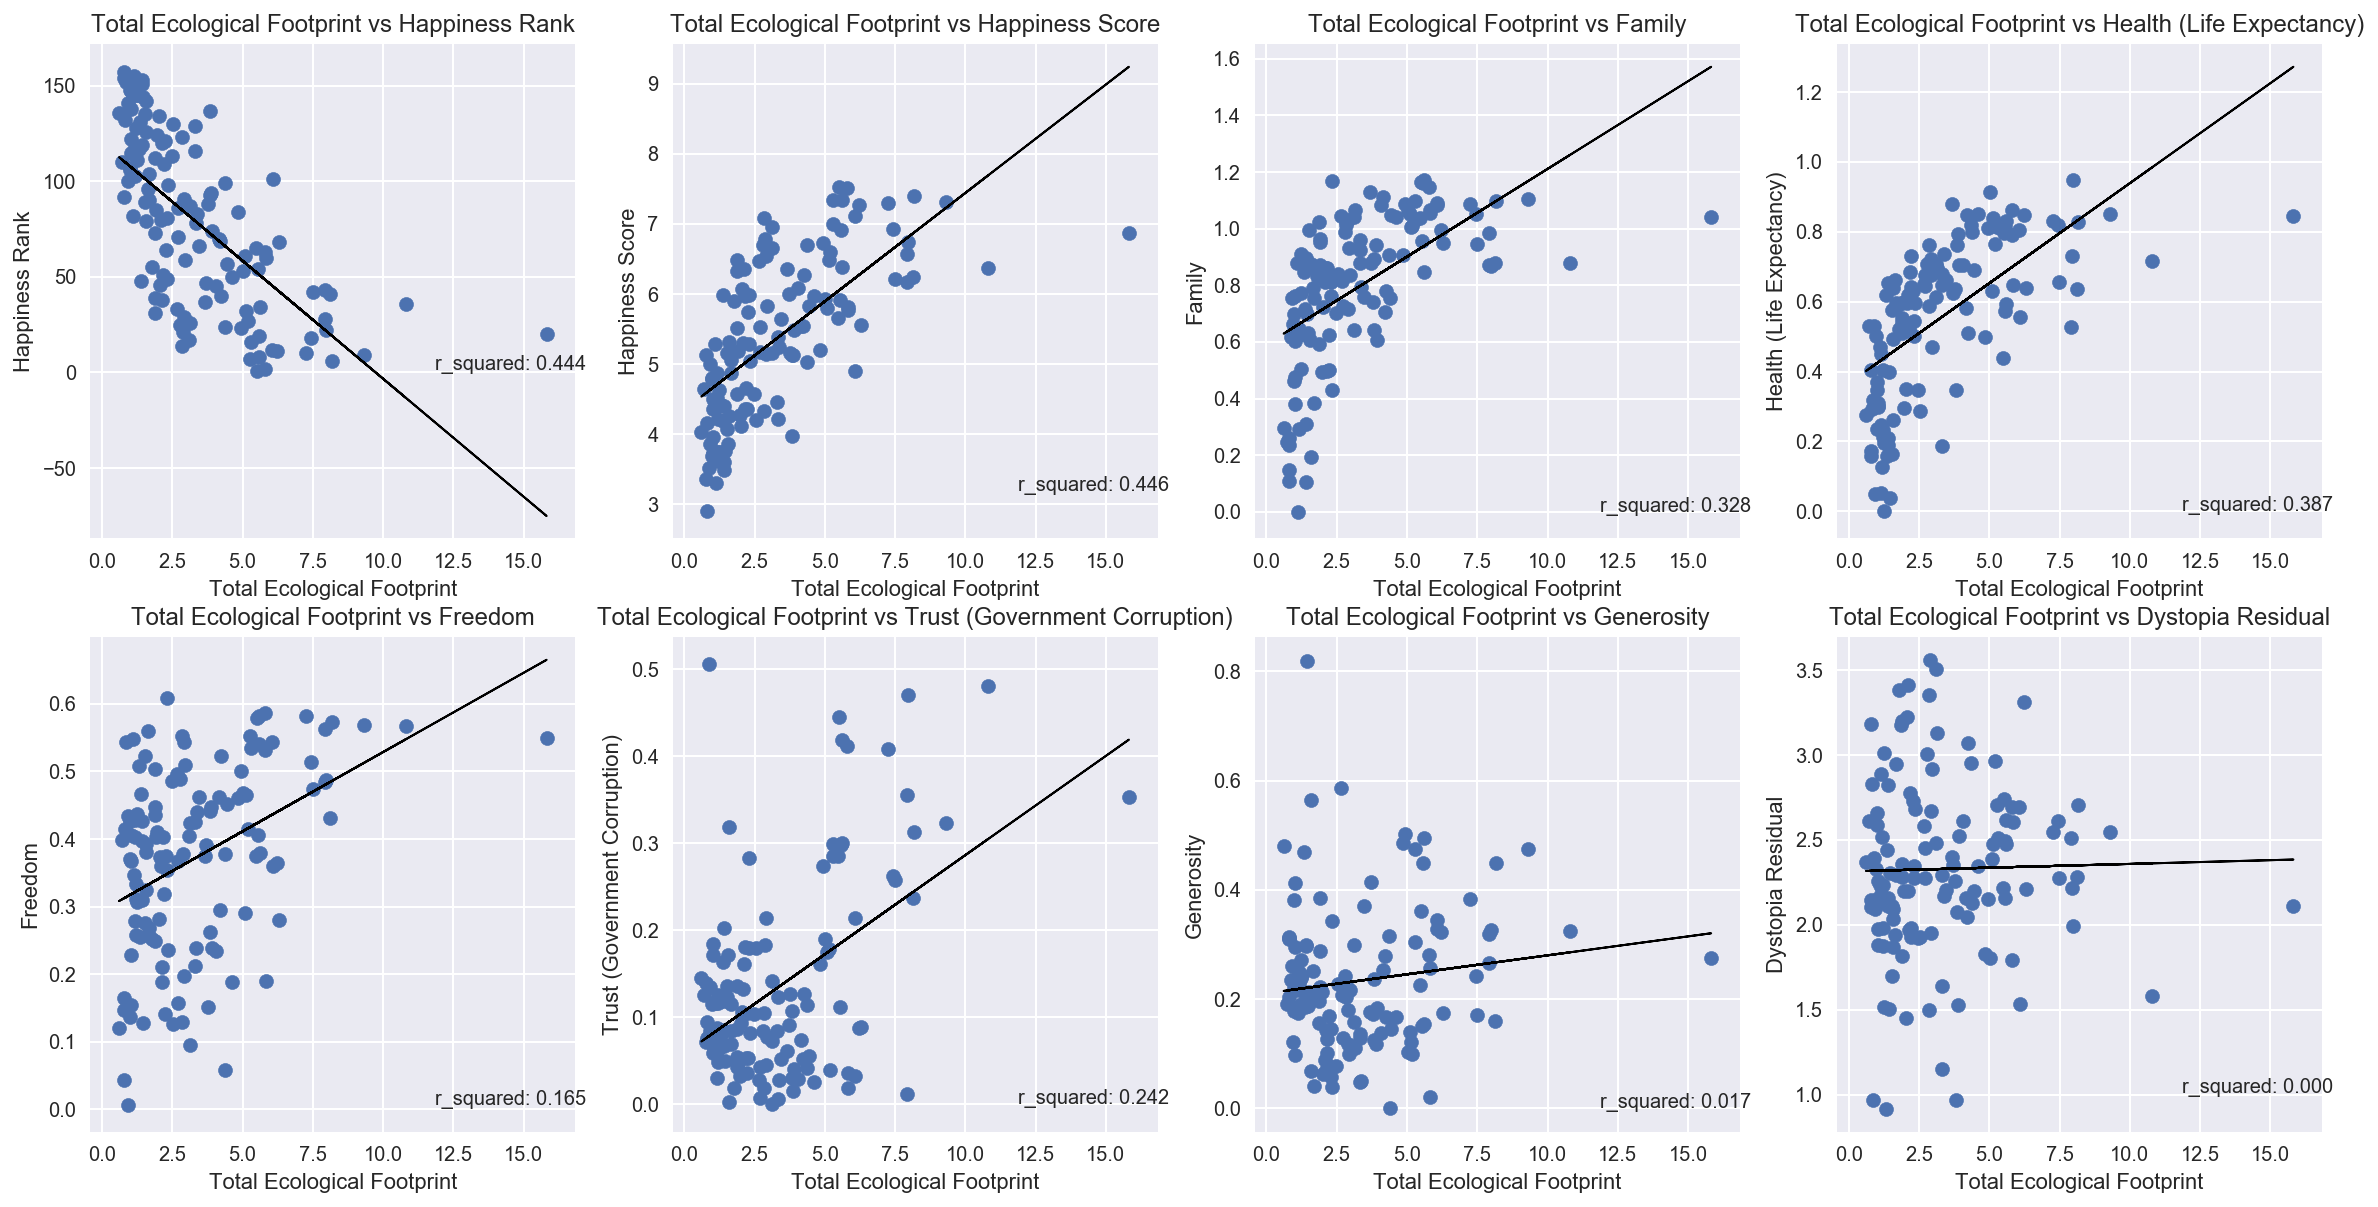

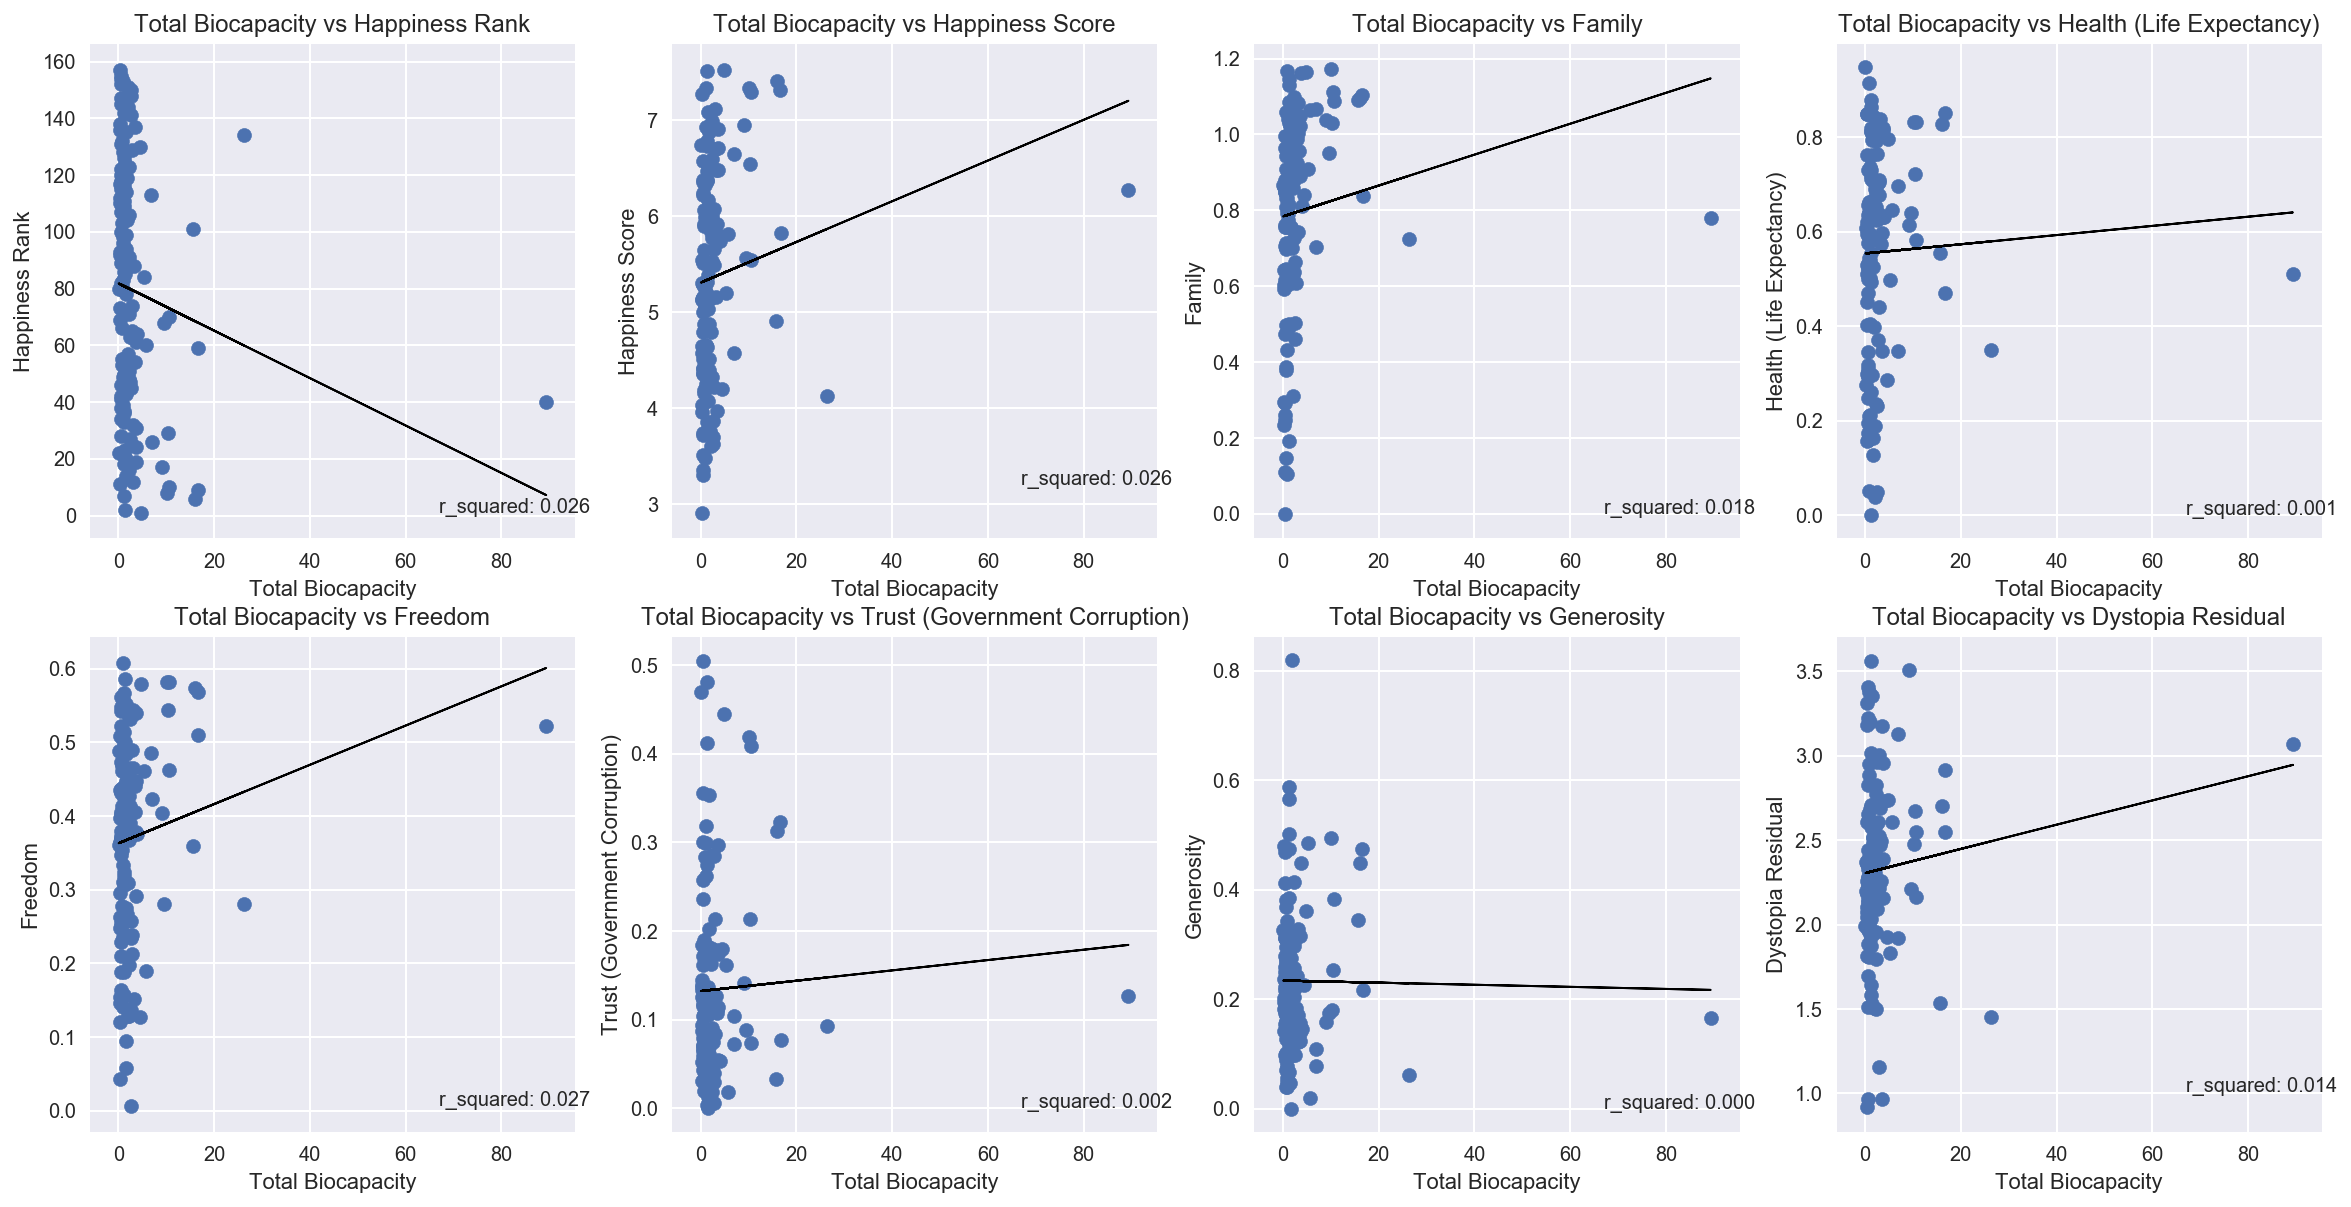

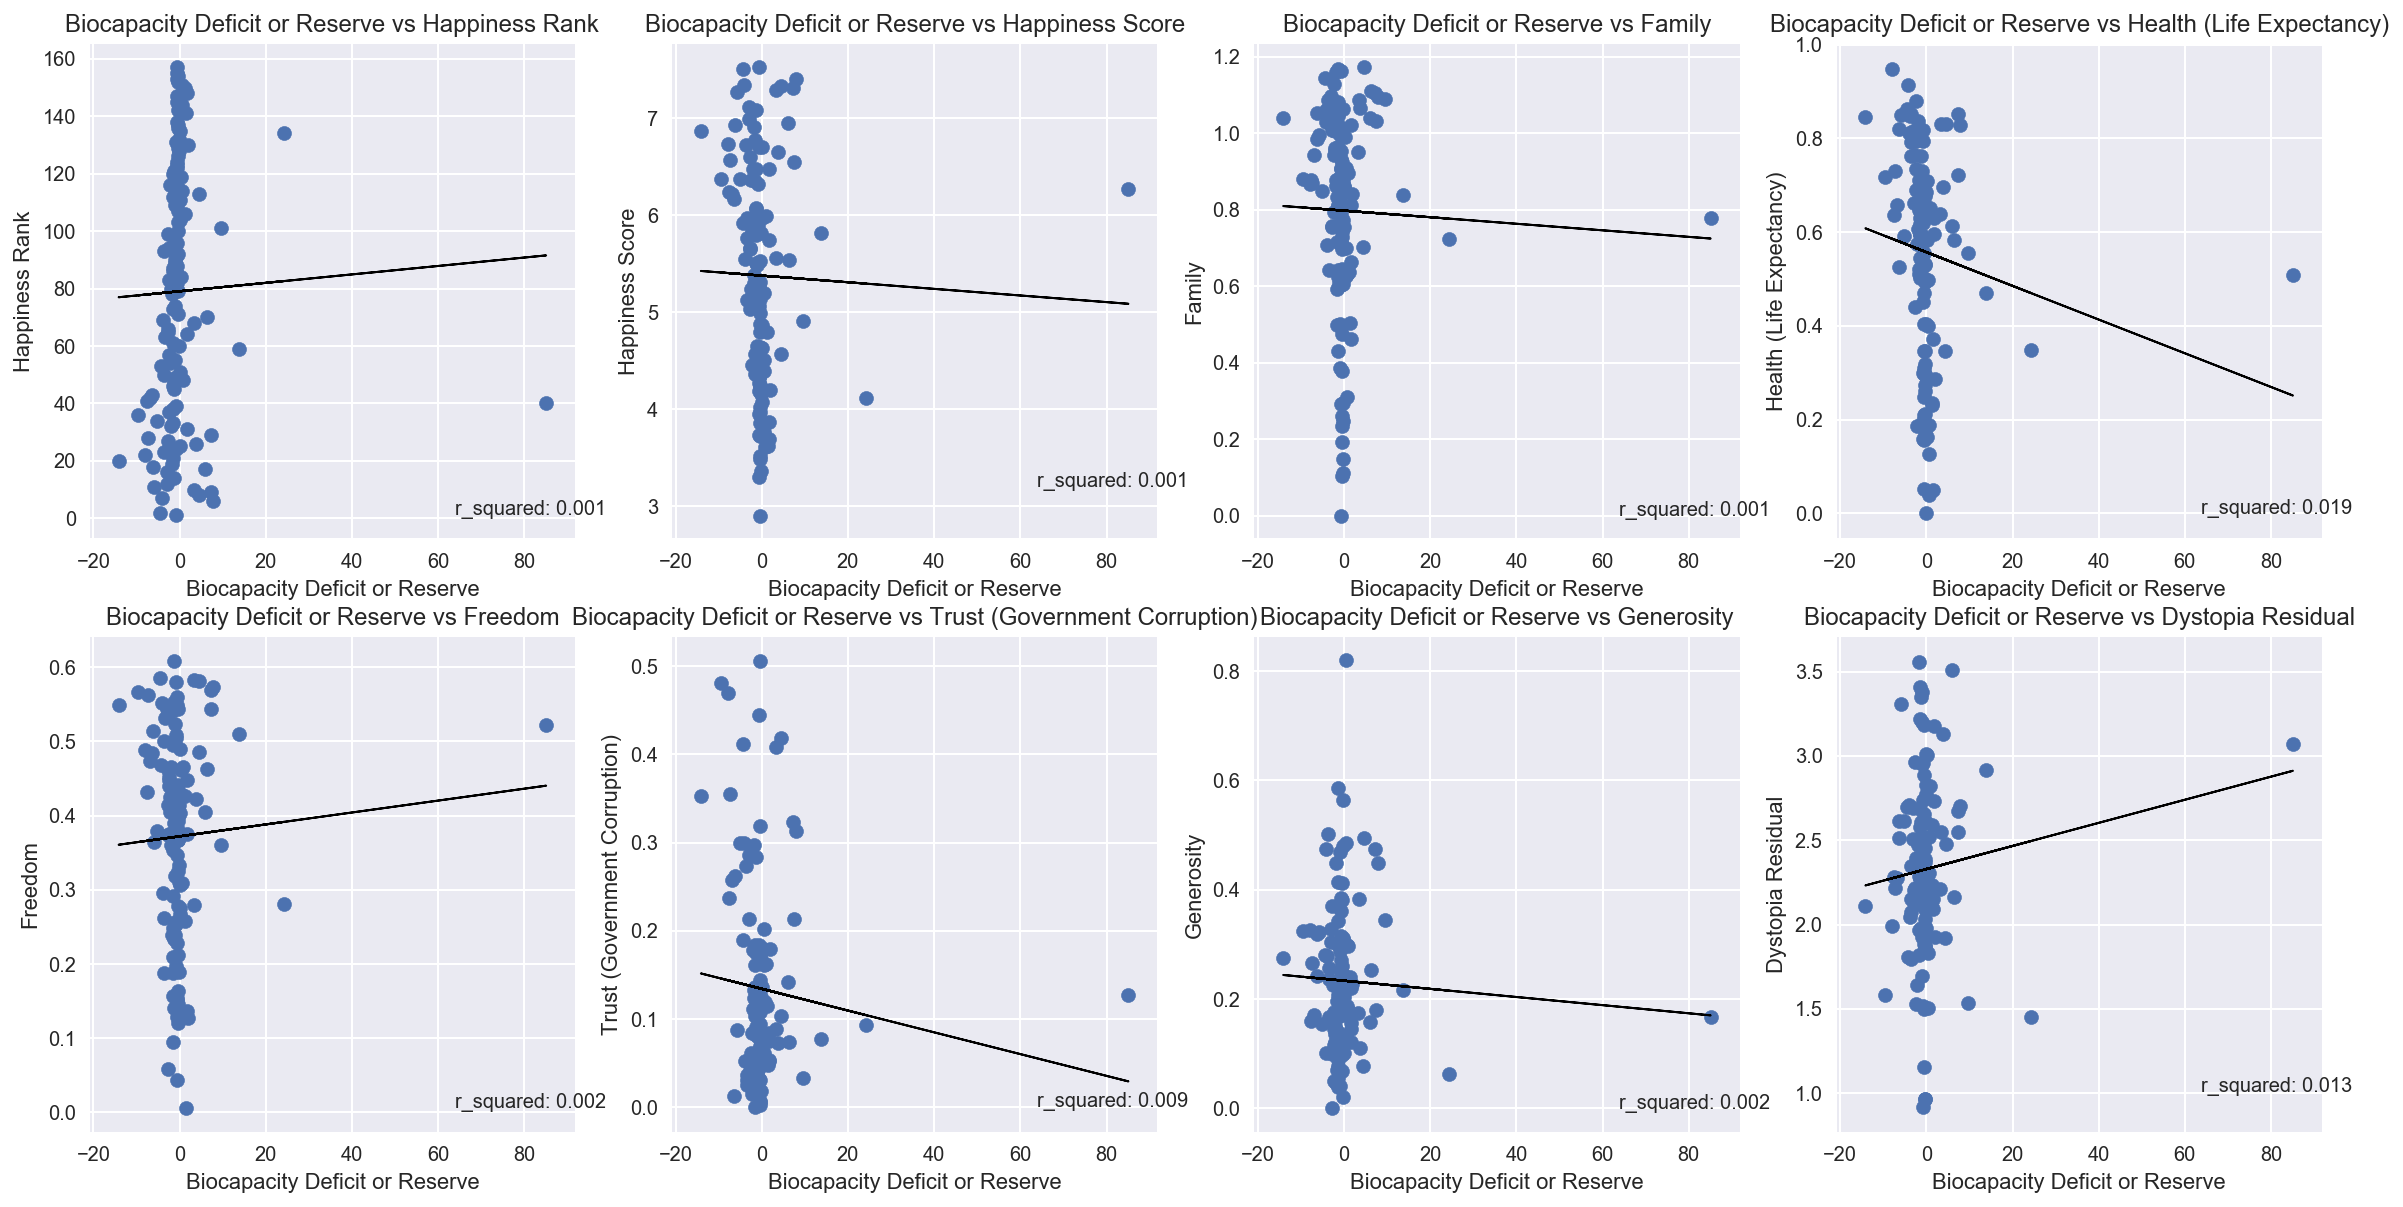

In [6]:
resources = ['Total Ecological Footprint', 'Total Biocapacity', 'Biocapacity Deficit or Reserve']
traits = ['Happiness Rank', 'Happiness Score', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

for resource in resources:
    plt.figure(figsize=(20, 10))
    for t in range(len(traits)):
        inputs = data[resource].values.reshape(-1, 1)
        outputs = data[traits[t]].values

        regr = linear_model.LinearRegression()
        regr.fit(inputs, outputs)    
        preds = regr.predict(inputs)

        xcoo = max(inputs) * 0.75
        ycoo = min(outputs) * 1.10
        
        plt.subplot(2, 4, t + 1)
        plt.plot(inputs, preds, color='black', linewidth=1)
        plt.scatter(inputs, outputs)
        plt.text(xcoo, ycoo, f"r_squared: {r2_score(outputs, preds):.3f}", fontsize=10)
        plt.title(f"{resource} vs {traits[t]}")
        plt.xlabel(f"{resource}")
        plt.ylabel(f"{traits[t]}")
    
    plt.show()